<a href="https://colab.research.google.com/github/esgalimov/first_ml_steps/blob/main/baseline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Ник на kaggle: Эмиль_Галимов

# Первая часть. Исследование

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных

In [2]:
data = pd.read_csv('./train.csv')

In [3]:
# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
# целевая переменная
target_col = 'Churn'

In [4]:
# посмотри на первые несколько строк таблицы
data.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


In [5]:
# типы данных колонок
data.dtypes

ClientPeriod                  int64
MonthlySpending             float64
TotalSpent                   object
Sex                          object
IsSeniorCitizen               int64
HasPartner                   object
HasChild                     object
HasPhoneService              object
HasMultiplePhoneNumbers      object
HasInternetService           object
HasOnlineSecurityService     object
HasOnlineBackup              object
HasDeviceProtection          object
HasTechSupportAccess         object
HasOnlineTV                  object
HasMovieSubscription         object
HasContractPhone             object
IsBillingPaperless           object
PaymentMethod                object
Churn                         int64
dtype: object

Видим, что TotalSpent принадлежит к типу object, но является числовым признаком. Нужно привести его к типу float.

In [6]:
# исправим это
data['TotalSpent'] = pd.to_numeric(data['TotalSpent'], errors='coerce')

In [7]:
# значения nan в таблице
data.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  9
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

In [8]:
# замена nan на 0
data = data.replace(np.nan, 0)

In [9]:
# проверка на дубликаты
data.duplicated().value_counts()

False    5268
True       14
dtype: int64

In [10]:
# избавляемся от дубликатов
data = data.drop_duplicates()

## Анализ данных
Строим гистограммы для чиссленных признаков и круговые диаграммы для категориальных. Смотрим на распределение целевой переменной.

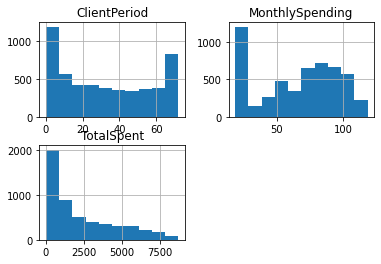

In [11]:
# численные признаки
data.hist(column=num_cols)
None

In [12]:
# распределение категориальных признаков
for col in cat_cols:
    print(f'{col} DISTRIBUTION')
    print(data[col].value_counts())
    print()

Sex DISTRIBUTION
Male      2647
Female    2621
Name: Sex, dtype: int64

IsSeniorCitizen DISTRIBUTION
0    4427
1     841
Name: IsSeniorCitizen, dtype: int64

HasPartner DISTRIBUTION
No     2691
Yes    2577
Name: HasPartner, dtype: int64

HasChild DISTRIBUTION
No     3662
Yes    1606
Name: HasChild, dtype: int64

HasPhoneService DISTRIBUTION
Yes    4747
No      521
Name: HasPhoneService, dtype: int64

HasMultiplePhoneNumbers DISTRIBUTION
No                  2497
Yes                 2250
No phone service     521
Name: HasMultiplePhoneNumbers, dtype: int64

HasInternetService DISTRIBUTION
Fiber optic    2335
DSL            1798
No             1135
Name: HasInternetService, dtype: int64

HasOnlineSecurityService DISTRIBUTION
No                     2604
Yes                    1529
No internet service    1135
Name: HasOnlineSecurityService, dtype: int64

HasOnlineBackup DISTRIBUTION
No                     2324
Yes                    1809
No internet service    1135
Name: HasOnlineBackup, dty

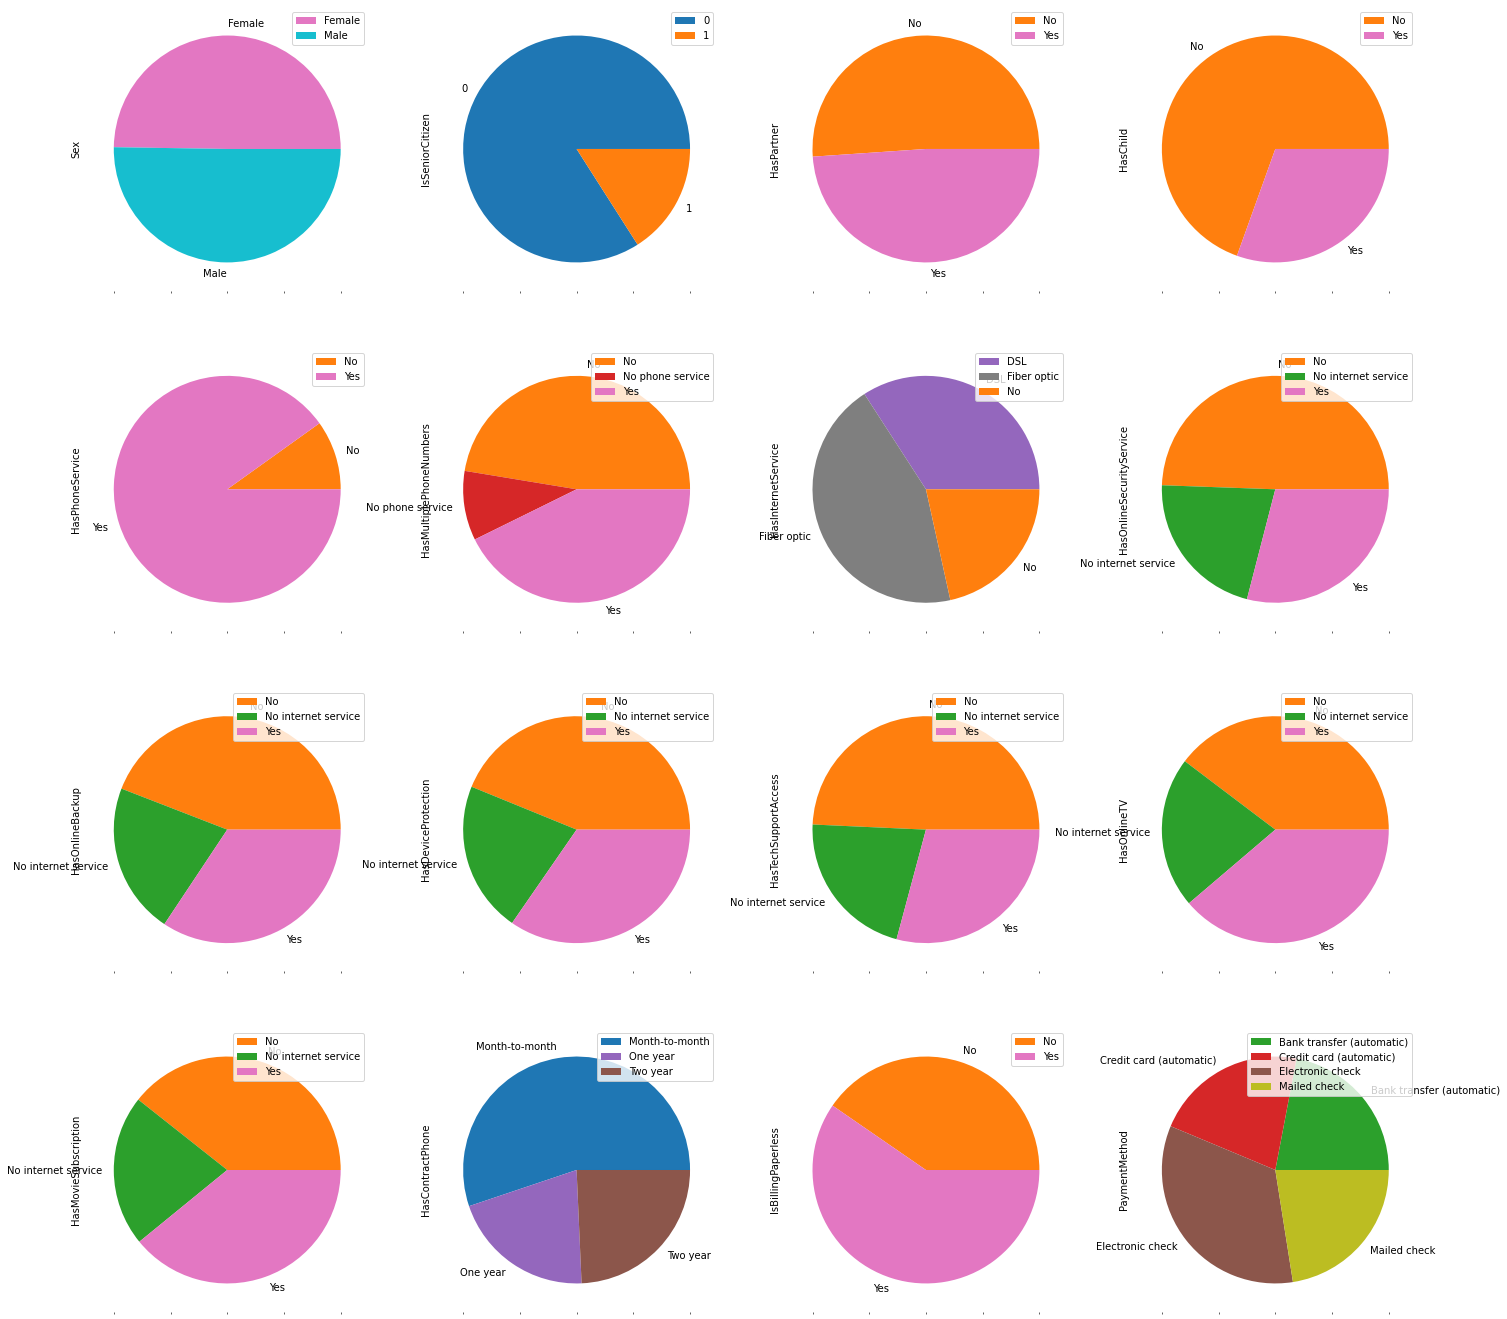

In [13]:
data[cat_cols].apply(pd.value_counts).plot(kind='pie',
                     subplots=True, layout=(4, 4), figsize=(24, 24))
None

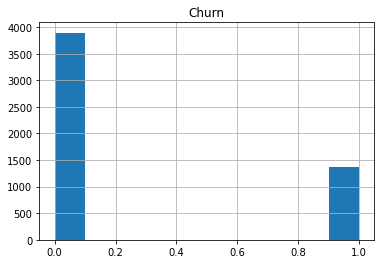

In [14]:
# целевая переменная
data.hist(column=target_col)
None

Мы видим, классы целевой переменной являются сбалансированными.

## Применение линейных моделей

In [88]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score

Для начала применем one-hot-encoding.

In [89]:
# one-hot-encoding
dummy_features = pd.get_dummies(data[cat_cols])
numeric_data = data[num_cols]
X = pd.concat([numeric_data, dummy_features], axis=1)
y = data[target_col]

# сохраняем первоначальную таблицу
X_origin = data.iloc[:, :-1]
# смотрим, что получилось
X.head()

,ClientPeriod,MonthlySpending,TotalSpent,IsSeniorCitizen,Sex_Female,Sex_Male,HasPartner_No,HasPartner_Yes,HasChild_No,HasChild_Yes,HasPhoneService_No,HasPhoneService_Yes,HasMultiplePhoneNumbers_No,HasMultiplePhoneNumbers_No phone service,HasMultiplePhoneNumbers_Yes,HasInternetService_DSL,HasInternetService_Fiber optic,HasInternetService_No,HasOnlineSecurityService_No,HasOnlineSecurityService_No internet service,HasOnlineSecurityService_Yes,HasOnlineBackup_No,HasOnlineBackup_No internet service,HasOnlineBackup_Yes,HasDeviceProtection_No,HasDeviceProtection_No internet service,HasDeviceProtection_Yes,HasTechSupportAccess_No,HasTechSupportAccess_No internet service,HasTechSupportAccess_Yes,HasOnlineTV_No,HasOnlineTV_No internet service,HasOnlineTV_Yes,HasMovieSubscription_No,HasMovieSubscription_No internet service,HasMovieSubscription_Yes,HasContractPhone_Month-to-month,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_No,IsBillingPaperless_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,55,19.50,1026.35,0,0,1,0,1,0,1,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1
1,72,25.85,1872.20,0,0,1,0,1,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0
2,1,75.90,75.90,0,0,1,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
3,32,79.30,2570.00,1,1,0,0,1,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1
4,60,115.25,6758.45,0,1,0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,1,0,0


Разделяем выборку на train и test, нормируем признаки с помощью StandardScaler.

In [90]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y,
                                                    train_size=0.8,
                                                    random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

Используем LogisticRegressionCV.

In [91]:
clf = LogisticRegressionCV(cv=5, scoring='roc_auc', refit=True)
clf.fit(X_train_scaled, y_train)
y_pred = clf.predict_proba(X_valid_scaled)[:, 1]
print('Качество:')
print(f'ROC-AUC: {roc_auc_score(y_valid, y_pred)}')
clf.get_params

Качество:
ROC-AUC: 0.8435061437390948


<bound method BaseEstimator.get_params of LogisticRegressionCV(Cs=10, class_weight=None, cv=5, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='auto', n_jobs=None,
                     penalty='l2', random_state=None, refit=True,
                     scoring='roc_auc', solver='lbfgs', tol=0.0001, verbose=0)>

Получаем качество на тесте 0.8435061437390948.

Попробуем другой вариант. Подберем параметры по сетке.


In [92]:
clf2 = LogisticRegression()
params = {'C': [1000, 100, 10, 1, 0.1, 0.01, 0.001, 0.0001],
          'penalty': ['l1', 'l2'],
          'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

clf_grid = GridSearchCV(clf2, params, cv=5, refit=True,
                        scoring='roc_auc', n_jobs=-1)
clf_grid.fit(X_train_scaled, y_train)
print(clf_grid.best_params_)
y_pred_2 = clf_grid.best_estimator_.predict_proba(X_valid_scaled)[:, 1]
print('Качество:')
print(f'ROC-AUC: {roc_auc_score(y_valid, y_pred_2)}')
clf_grid.best_estimator_

{'C': 1000, 'penalty': 'l2', 'solver': 'saga'}
Качество:
ROC-AUC: 0.8430825963455226


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

Получаем качество 0.8430825963455226. Параметры: {'C': 1000, 'penalty': 'l2', 'solver': 'saga'}

Пребор по сетке не дал лучшего качества. В итоге лучшим осталось 0.8435061437390948. 

## Применение градиентного бустинга

In [26]:
!pip install catboost

     |████████████████████████████████| 76.3 MB 21 kB/s 


In [79]:
import catboost


X_train_origin, X_valid_origin, y_train, y_valid = train_test_split(
    X_origin, y, train_size=0.8, random_state=1)

# стандартные параметры
boosting_model = catboost.CatBoostClassifier(n_estimators=200, silent=True,
                                             cat_features=cat_cols)

boosting_model.fit(X_train_origin, y_train)
y_test_pred = boosting_model.predict_proba(X_valid_origin)[:, 1]
print('Качество на тесте')
roc_auc_score(y_valid, y_test_pred)

Качество на тесте


0.8660721241868256

Со стандартными параметрами и n_estimators=200 получается качество: 0.8660721241868256

Попробуем перебрать значения по сетке.

In [80]:
# перебираем learning_rate и n_estimators
boosting_model2 = catboost.CatBoostClassifier(silent=True,
                                             cat_features=cat_cols,
                                             eval_metric='AUC')

boosting_model2.grid_search({'learning_rate': np.linspace(0, 0.1, 20),
                            'n_estimators': np.linspace(0, 300, 10)}, 
                           X_train_origin, 
                           y_train, refit=True)


bestTest = 0.8052658522
bestIteration = 99

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
0:	loss: 0.8052659	best: 0.8052659 (0)	total: 621ms	remaining: 2m 3s

bestTest = 0.8173059859
bestIteration = 99

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
1:	loss: 0.8173060	best: 0.8173060 (1)	total: 1.23s	remaining: 2m 1s

bestTest = 0.8215309535
bestIteration = 96

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
2:	loss: 0.8215310	best: 0.8215310 (2)	total: 1.83s	remaining: 2m

bestTest = 0.8206436421
bestIteration = 99

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
3:	loss: 0.8206436	best: 0.8215310 (2)	total: 2.44s	remaining: 1m 59s

bestTest 

{'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
               47,
               48,
               49,
             

In [81]:
y_test_pred = boosting_model2.predict_proba(X_valid_origin)[:, 1]
roc_auc_score(y_valid, y_test_pred)

0.8702572942230532

Лучшее качество: 0.8702572942230532. Параметры: {'iterations': 100.0, 'learning_rate': 0.09473684210526316}
Мы видим, что качество улучшилось по сравнению со стандартными параметрами.



# Предсказания

Лучшая модель получена с помощью Градиентного бустинга. Параметры: {'iterations': 100.0, 'learning_rate': 0.09473684210526316}

In [82]:
best_model = boosting_model2

In [84]:
X_test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv')

submission['Churn'] = best_model.predict_proba(X_test)[:, 1]
submission.to_csv('./my_submission.csv', index=False)

##На kaggle получилось качество 0.85009
